#                                             SIG720: Machine Learning 

# TASK 4:

## B PRIYANKAA

### s224207694
### priyayj2016@gmail.com

## TARGET GRADE: PASS(P)

## ABSTRACT:

### In order to find if the electrical grid is stable or unstable based on the dataset given.

## TASKS:

1. To download Electrical Grid Stability Simulated Data dataset from the link, "https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data" and print the dimension of the dataset.

2. To classify the "Electrical Grid Stability Simulated Data" (target=stabf) available in the dataset using SVM with three different kernels.

    - 2.1 To select appropriate data splitting approach and performance metrics.
    
    - 2.2 To report the performances and the used model hyper-parameters.
    
    
    
3. To use the same training and test set, use KNN and tune K on the training set, report the performance on the test set and the optimal K.

4. To use the same training and test set, use Decision Tree and tune the depth of the tree on the training set, report the performance on the test set and the optimal depth.

5. To share my understanding of hyper-parameters tuning in ML model development based on the model hyper-parameters used in question 2, 3 and question 4.

### All the necessary libraries are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# 1. Download Electrical Grid Stability Simulated Data dataset and print the dimension of the dataset.

1. The dataset is downloaded from the "https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data". The zipped folder, electrical+grid+stability+simulated+data.zip.

2. The zipped folder is then extracted. Then extracted folder is in the name "electrical+grid+stability+simulated+data".

3. The csv file with the name "Data_for_UCI_named.csv" is then copied to Users folder of Local c drive.

In [2]:
#Pandas library- essential for handling and manipulating data in Python

import pandas as pd

df = pd.read_csv("Data_for_UCI_named.csv")

df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


- The first step is to download the dataset and it is stored in the variable name: df.

- The dimension of the dataset is said to be 10000 rows and 14 columns.

In [3]:
print('The shape of the dataset',df.shape)

The shape of the dataset (10000, 14)


In [4]:
print('The columns present in the dataset',df.columns)

The columns present in the dataset Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')


In [5]:
print('The datatypes of the columns present are:',df.dtypes.value_counts())

The datatypes of the columns present are: float64    13
object      1
dtype: int64


#### There are totally 14 columns where 13 columns are of float64 and 1 column with the name 'stabf' of dtype object.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
# Print feature names with the number of missing entries
missing_entries = df.isnull().sum()
print(missing_entries)

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64


In [8]:
df.corr()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


### Heatmap helps in better understanding of how the features are actually correlated. Dark colours denotes negative correlation and lighter shades denotes positive correlation.

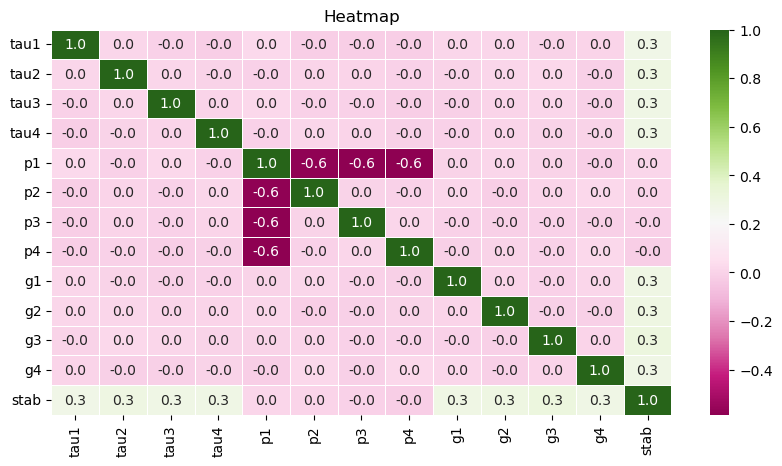

In [9]:
plt.figure(figsize=(10,5))
plt.title('Heatmap')
sns.heatmap(df.corr(), annot=True,linewidths= '.5',fmt ='.1f',cmap = 'PiYG')# corr() is used to find the correlation between features and hence visulaised
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

## INSIGHTS FROM THE ABOVE HEATMAP:

### A. Features having stronger correlation with correlation value:

1. tau1, tau2, tau3, tau4, g1, g2, g3, g4 has a positive correlation value of 0.3 with stab feature.

### B. Features having weaker correlation with correlation value:

1. p1 with respective other p2, p3, p4 values have a negative correlation value of -0.6 with eachother.

In [10]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


## INSIGHTS FROM FIVE-POINT SUMMARY:

1. The minimum value of tau1 - tau4 ranges almost from 0.50 to the maximum value of 9.99.

2. The mean value of p1 is 3.750000 and mean values of p2, p3, p4 is -1.250000.

# 2. Classify the "Electrical Grid Stability Simulated Data" (target=stabf) available in the dataset using SVM with three different kernels. Select appropriate data splitting approach and performance metrics. Report the performances and the used model hyper-parameters.

#### Step 2:

- To divide the dataset into features and target variables.
- Zscale is performed on the X.
- SVM models with various kernels are tested and their performance metrics are reported.

In [11]:
X = df.drop(columns='stabf')
# X is an independent variable.
y = df['stabf']
# y is the target variable.

In [12]:
X.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [13]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [14]:
X_Scaled = X.apply(zscore)

In [15]:
y.describe()

count        10000
unique           2
top       unstable
freq          6380
Name: stabf, dtype: object

### Scaling Independent variables by applying Z-score: Mean becomes 0 and standard deviation is 1.

In [16]:
df['stabf'].unique()

array(['unstable', 'stable'], dtype=object)

- There are 2 values in the target variable y. They are: unstable, stable.

In [17]:
X_train, X_test, y_train, y_test =train_test_split(X_Scaled,y, test_size=.30,random_state=42) 

In [18]:
# Print shapes
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (7000, 13)
X_test: (3000, 13)
y_train: (7000,)
y_test: (3000,)


Out of 10000 columns, 7000 are used for training and 3000 are used for testing the model developed.

### 1. SVM Model with kernel: 'rbf'

In [19]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model = SVC(C=0.1, kernel='rbf', gamma=1) # Parameters are set

svc_model.fit(X_train, y_train)
# Model is fit on the Trainign Data
prediction = svc_model.predict(X_test)
#labels are predicted based on X_test values

### Printing the evaluation metrics for the SVM model with kernel 'rbf'

1.1. Accuracy

1.2. Confusion Matrix

1.3. Classification Report.

#### 1.1. Accuracy

In [20]:
print('The score of the model using the training dataset',svc_model.score(X_train, y_train))
print('The score of the model using the testing dataset',svc_model.score(X_test, y_test))

The score of the model using the training dataset 0.6344285714285715
The score of the model using the testing dataset 0.6463333333333333


#### 1.2. Confusion Matrix

Confusion Matrix


<Axes: >

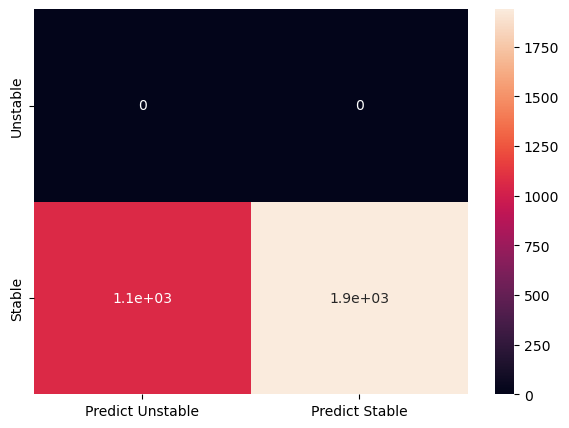

In [21]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["Unstable","Stable"]],
                  columns = [i for i in ["Predict Unstable","Predict Stable"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### 1.3. Classification Report:

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn import model_selection

print('Classification matrix:\n',classification_report(prediction,y_test))

Classification matrix:
               precision    recall  f1-score   support

      stable       0.00      0.00      0.00         0
    unstable       1.00      0.65      0.79      3000

    accuracy                           0.65      3000
   macro avg       0.50      0.32      0.39      3000
weighted avg       1.00      0.65      0.79      3000



### Conclusion for the SVM Model with kernel: 'rbf'

1. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 63.4% on training data and 64.6% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here stable postitive predictions are actually correct.

3. Recall is the proportion of actual positives that were correctly identified. Unstable output has a recall value of 65%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "unstable" is 79%.

### 2. SVM Model with kernel: 'poly'

In [23]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model1 = SVC(C=0.1, kernel='poly', gamma=1) # Parameters are set

svc_model1.fit(X_train, y_train)
# Model is fir on the Trainign Data
prediction1 = svc_model1.predict(X_test)
#labels are predicted based on X_test values

### Printing the evaluation metrics for the SVM model with kernel 'ploy'

2.1. Accuracy

2.2. Confusion Matrix

2.3. Classification Report.

#### 2.1 Accuracy:

In [24]:
print('The score of the model using the training dataset',svc_model1.score(X_train, y_train))
print('The score of the model using the testing dataset',svc_model1.score(X_test, y_test))

The score of the model using the training dataset 0.999
The score of the model using the testing dataset 0.9726666666666667


#### 2.2. Confusion Matrix:

Confusion Matrix


<Axes: >

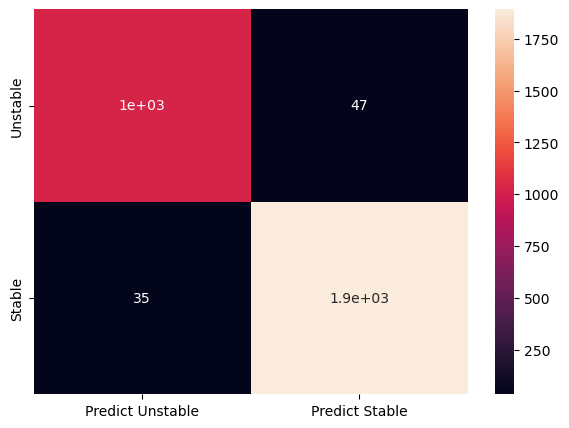

In [25]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction1,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["Unstable","Stable"]],
                  columns = [i for i in ["Predict Unstable","Predict Stable"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### 2.3. Classification Report:

In [26]:
print('Classification matrix:\n',classification_report(prediction1,y_test))

Classification matrix:
               precision    recall  f1-score   support

      stable       0.97      0.96      0.96      1073
    unstable       0.98      0.98      0.98      1927

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



### Conclusion for the SVM Model with kernel: 'poly'

1. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 99.9% on training data and 97.2% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here stable postitive predictions are actually correct with 97% and unstable postitive predictions are actually correct with 98%.

3. Recall is the proportion of actual positives that were correctly identified. Unstable output has a recall value of 98%.
   stable output has a recall value of 96%

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "unstable" is 98%.

### 3. SVM Model with kernel: 'sigmoid'

In [27]:
from sklearn.svm import SVC
# SVC function is imported from sklearn.
# kernel ='rbf' specifies that there is no kernel used.
svc_model2 = SVC(C=0.1, kernel='sigmoid', gamma=1) # Parameters are set

svc_model2.fit(X_train, y_train)
# Model is fir on the Trainign Data
prediction2 = svc_model2.predict(X_test)
#labels are predicted based on X_test values

### Printing the evaluation metrics for the SVM model with kernel 'ploy'

3.1. Accuracy

3.2. Confusion Matrix

3.3. Classification Report.

#### 3.1. Accuracy

In [28]:
print('The score of the model using the training dataset',svc_model2.score(X_train, y_train))
print('The score of the model using the testing dataset',svc_model2.score(X_test, y_test))

The score of the model using the training dataset 0.8378571428571429
The score of the model using the testing dataset 0.854


#### 3.2. Confusion Matrix

Confusion Matrix


<Axes: >

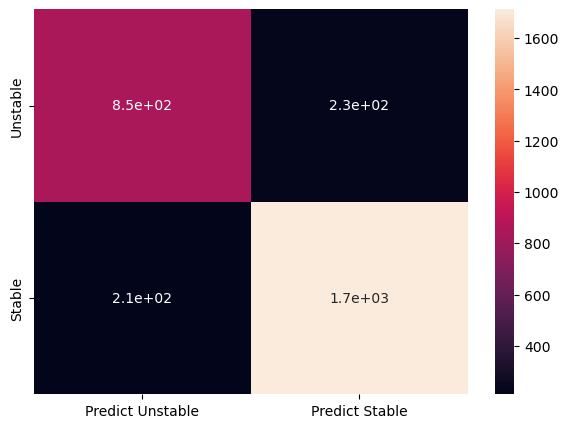

In [29]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(prediction2,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["Unstable","Stable"]],
                  columns = [i for i in ["Predict Unstable","Predict Stable"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### 3.3. Classification Report:

In [30]:
print('Classification matrix:\n',classification_report(prediction2,y_test))

Classification matrix:
               precision    recall  f1-score   support

      stable       0.80      0.79      0.80      1077
    unstable       0.88      0.89      0.89      1923

    accuracy                           0.85      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.85      0.85      0.85      3000



### Conclusion for the SVM Model with kernel: 'sigmoid'

1. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 83.7% on training data and 85.4% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here stable postitive predictions are actually correct with 80% and unstable postitive predictions are actually correct with 88%.

3. Recall is the proportion of actual positives that were correctly identified. Unstable output has a recall value of 79%. stable output has a recall value of 89%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "unstable" is 89% and f1 score of target variable with "stable" is 80%.

# 3. Continue from question 2, use the same training and test set, use KNN and tune K on the training set, report the performance on the test set and the optimal K.

### KneighborsClassifier is used for building the Supervised Learning Classification Base model.

## KNeighborsClassifier implements learning based on number of neighbors based on fixed 'r' radius and 'r' is a floating point.

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

The various parameters in KNeighboursClassifier has n_neighbors, metric, algorithm, leaf, weights,p:


1. No. of Neighbors for each query point are 5
2. Here, The metric is "euclidean".
3. The default weights is 'uniform' - All points are weighted equally.

In [33]:
KNN.fit(X_train,y_train)
# Fitting the KNN model on training data : X,y
pred_labels = KNN.predict(X_test)
#Using the X_test values as input ,labels are predicted and stored in pred_labels

### Accuracy:

In [34]:
print('Accuracy on Training Data',KNN.score(X_train,y_train))
print('\n')
print('Accuracy on Testing Data',KNN.score(X_test,y_test))

Accuracy on Training Data 0.9645714285714285


Accuracy on Testing Data 0.9326666666666666


### Confusion Matrix:

Confusion Matrix


<Axes: >

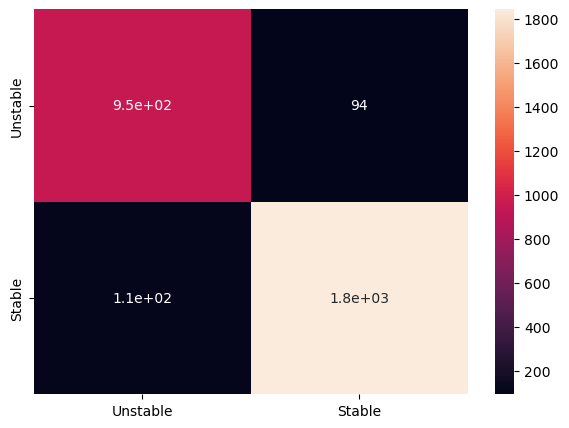

In [35]:
from sklearn import metrics

print("Confusion Matrix")
cm=metrics.confusion_matrix(pred_labels,y_test)

df_cm = pd.DataFrame(cm, index = [i for i in ["Unstable","Stable"]],
                  columns = [i for i in ["Unstable","Stable"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

### Classification Matrix:

In [36]:
print('Classification Matrix:\n',classification_report(y_test,pred_labels))

Classification Matrix:
               precision    recall  f1-score   support

      stable       0.91      0.90      0.90      1061
    unstable       0.94      0.95      0.95      1939

    accuracy                           0.93      3000
   macro avg       0.93      0.92      0.93      3000
weighted avg       0.93      0.93      0.93      3000



### Finding optimal K value and printing the performance metrics:

In [37]:
#For the range of values of 1 to 51 of k, KNN model is fit on training data :X,y
train_score = []
test_score = []
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    KNN.fit(X_train,y_train)
    train_score.append(KNN.score(X_train,y_train))
    test_score.append(KNN.score(X_test,y_test))

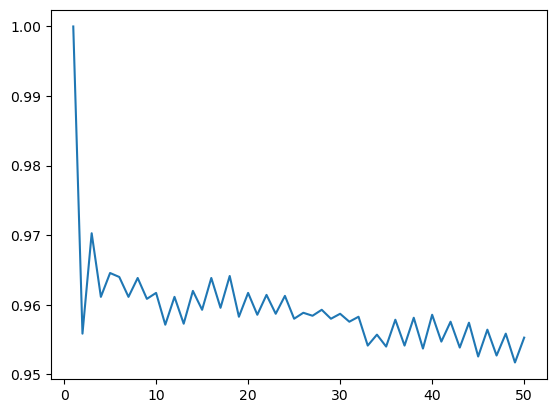

In [38]:
#Train Accuracy score is calculated for range of values of 1 to 51
plt.plot(range(1,51),train_score)
plt.show()

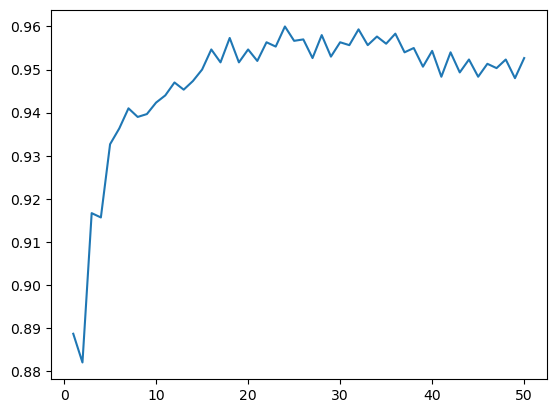

In [39]:
#Test Accuracy score is calculated for range of values of 1 to 51
plt.plot(range(1,51),test_score)
plt.show()

1. Maximum Accuracy is high, when k is less than 25.

2. We will have to fix k for less than 25.

In [40]:
k = [1,3,5,7,9,11,13,15,17,19,21,23,25,27]
for i in k:
    KNN = KNeighborsClassifier(n_neighbors = i, metric = 'euclidean')
    KNN.fit(X_train,y_train)
    pred_labels = KNN.predict(X_test)
    print('Accuracy on Training Data for k {} is {}:'.format(i,KNN.score(X_train,y_train)))
    print('Accuracy on Testing Data for k {} is {}:'.format(i,KNN.score(X_test,y_test)))
    print('Classification matirix:\n',classification_report(y_test,pred_labels))

Accuracy on Training Data for k 1 is 1.0:
Accuracy on Testing Data for k 1 is 0.8886666666666667:
Classification matirix:
               precision    recall  f1-score   support

      stable       0.84      0.85      0.84      1061
    unstable       0.92      0.91      0.91      1939

    accuracy                           0.89      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.89      0.89      0.89      3000

Accuracy on Training Data for k 3 is 0.9702857142857143:
Accuracy on Testing Data for k 3 is 0.9166666666666666:
Classification matirix:
               precision    recall  f1-score   support

      stable       0.89      0.88      0.88      1061
    unstable       0.93      0.94      0.94      1939

    accuracy                           0.92      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.92      0.92      0.92      3000

Accuracy on Training Data for k 5 is 0.9645714285714285:
Accuracy on Testing Data for

### For this, to be achieved:

1. When n_neighbors was 5 :
Train Acc = 96.4% Test Acc = 93.2%

2. When n_neighbors was 25:
Train Acc = 95.8% Test Acc = 95.6%

3.  Precision has improved from 91% of stable and 94% of unstable when n_neighbors was 5 to 97% of stable and 95% of unstable.

Here when k is chosen as 25 then Accuracy and Precision are improved as mentioned above.

# 4. Continue from question 2, use the same training and test set, use Decision Tree and tune the depth of the tree on the training set, report the performance on the test set and the optimal depth.

### Step 4:

1. First work is to convert target to binary (stable: 1, unstable: 0).
2. Dividing the dataset into Training and testing.
3. Decision tree model is fitted on the dataset
4. Performance Metrics are printed.

In [41]:
X_dt = df.drop('stabf', axis=1)
y_dt = df['stabf'].apply(lambda x: 1 if x == 'stable' else 0)  # Convert target to binary (stable: 1, unstable: 0)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_dt, y_dt, test_size=0.3, random_state=42)

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate and print performance metrics
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Hyper-parameter tuning for Decision Tree
depth_values = range(1, 21)
best_depth = 1
best_score = 0
performance_metrics = {}

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    score = dt.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_depth = depth
    performance_metrics[depth] = evaluate_model(dt, X_test, y_test)

# Print the optimal depth and its performance metrics
print(f"Optimal Depth: {best_depth}")
print(f"Performance Metrics with Depth={best_depth}:")
print(f"Accuracy: {performance_metrics[best_depth][0]:.4f}")
print(f"Precision: {performance_metrics[best_depth][1]:.4f}")
print(f"Recall: {performance_metrics[best_depth][2]:.4f}")
print(f"F1 Score: {performance_metrics[best_depth][3]:.4f}")

Optimal Depth: 1
Performance Metrics with Depth=1:
Accuracy: 0.9997
Precision: 0.9991
Recall: 1.0000
F1 Score: 0.9995


### Conclusion:

1. The optimal depth is said to be 1.

2. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 99.7%

3. Precision is the proportion of positive predictions that were actually correct. Here it is said to be 99.9%.

4. Recall is the proportion of actual positives that were correctly identified. Here it is said to be 100%.

5. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable is said to be 99%.

# 5. Based on the model hyper-parameters used in question 2, 3 and question 4, share your understanding of hyper-parameters tuning in ML model development.

# SVM MODEL CONCLUSIONS:

### 1. Conclusion for the SVM Model with kernel: 'rbf'

1. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 63.4% on training data and 64.6% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here stable postitive predictions are actually correct.

3. Recall is the proportion of actual positives that were correctly identified. Unstable output has a recall value of 65%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "unstable" is 79%.

### 2. Conclusion for the SVM Model with kernel: 'poly'

1. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 99.9% on training data and 97.2% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here stable postitive predictions are actually correct with 97% and unstable postitive predictions are actually correct with 98%.

3. Recall is the proportion of actual positives that were correctly identified. Unstable output has a recall value of 98%.
   stable output has a recall value of 96%

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "unstable" is 98%.

### 3. Conclusion for the SVM Model with kernel: 'sigmoid'

1. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 83.7% on training data and 85.4% on the testing data.

2. Precision is the proportion of positive predictions that were actually correct. Here stable postitive predictions are actually correct with 80% and unstable postitive predictions are actually correct with 88%.

3. Recall is the proportion of actual positives that were correctly identified. Unstable output has a recall value of 79%. stable output has a recall value of 89%.

4. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable with "unstable" is 89% and f1 score of target variable with "stable" is 80%.

# KNN MODEL CONCLUSIONS:

1. When n_neighbors was 5 :
Train Acc = 96.4% Test Acc = 93.2%

2. When n_neighbors was 25:
Train Acc = 95.8% Test Acc = 95.6%

3.  Precision has improved from 91% of stable and 94% of unstable when n_neighbors was 5 to 97% of stable and 95% of unstable.

# Decision Tree Model Conclusions:

1. The optimal depth is said to be 1.

2. The accuracy is said to be the proportion of the total number of predictions that were correct. Here it is said to 99.7%

3. Precision is the proportion of positive predictions that were actually correct. Here it is said to be 99.9%.

4. Recall is the proportion of actual positives that were correctly identified. Here it is said to be 100%.

5. A high F1 score indicates the strong overall performance of a binary classification model. There is f1 score of target variable is said to be 99%.

# REFERENCE:
1. I. Dobson, "Electrical Grid Stability Simulated Data," UCI Machine Learning Repository, Aug. 2018. [Online]. Available: https://archive.ics.uci.edu/dataset/471/electrical+grid+stability+simulated+data